In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from scipy.misc import derivative
import plotly.graph_objects as go
import plotly.io as pio
import requests
from lmfit import minimize, Parameters, Parameter, report_fit
pio.renderers.default = "notebook"
%matplotlib inline
#%matplotlib qt
plt.style.use('ggplot')
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [2]:
# Jupyter Specifics
from IPython.display import HTML
from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout, ToggleButton, ToggleButtons

style = {'description_width': '100px'}
slider_layout = Layout(width='99%')

In [3]:
covid = pd.read_csv('covid.csv')
add_inf = pd.read_csv('owid-covid-data.csv')
covid.rename(columns={'Страна':'country', 'Дата':'date', 'Заражений':'total_cases', 'Выздоровлений':'total_recovered', 'Смертей':'total_deaths', 'Заражений за день':'new_cases', 'Выздоровлений за день':'new_recovered', 'Смертей за день':'new_deaths'}, inplace=True)
covid

,Unnamed: 0,country,date,total_cases,total_recovered,total_deaths,new_cases,new_recovered,new_deaths
0,0,ОАЭ,22.01.2020,0,0,0,0,0,0
1,1,Эфиопия,22.01.2020,0,0,0,0,0,0
2,2,Албания,22.01.2020,0,0,0,0,0,0
3,3,Колумбия,22.01.2020,0,0,0,0,0,0
4,4,Гватемала,22.01.2020,0,0,0,0,0,0
5,5,Тринидад и Тобаго,22.01.2020,0,0,0,0,0,0
6,6,Украина,22.01.2020,0,0,0,0,0,0
7,7,Мьянма,22.01.2020,0,0,0,0,0,0
8,8,Гамбия,22.01.2020,0,0,0,0,0,0
9,9,Маврикий,22.01.2020,0,0,0,0,0,0


# Выбор страны


In [4]:
selected_country = covid[(covid.country == 'Иран') & (covid.total_cases > 0)]
for col in ['total_cases', 'total_recovered', 'total_deaths', 'new_cases', 'new_recovered', 'new_deaths']:
    selected_country[col] = selected_country[col].astype('float')
    N = (add_inf[add_inf.location == 'Belarus']['population'].iloc[0])
    #нормировка на 100 000
    selected_country[col] = selected_country[col].mul(100000/N)
#Данные по выбранной стране
selected_country

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Unnamed: 0,country,date,total_cases,total_recovered,total_deaths,new_cases,new_recovered,new_deaths
5454,5454,Иран,19.02.2020,0.021166,0.000000,0.021166,0.021166,0.000000,0.021166
5682,5682,Иран,20.02.2020,0.052914,0.000000,0.021166,0.031748,0.000000,0.000000
5809,5809,Иран,21.02.2020,0.190490,0.000000,0.042331,0.137576,0.000000,0.021166
6017,6017,Иран,22.02.2020,0.296318,0.000000,0.052914,0.105828,0.000000,0.010583
6142,6142,Иран,23.02.2020,0.455059,0.000000,0.084662,0.158742,0.000000,0.031748
6359,6359,Иран,24.02.2020,0.645549,0.000000,0.126993,0.190490,0.000000,0.042331
6672,6672,Иран,25.02.2020,1.005363,0.000000,0.169324,0.359814,0.000000,0.042331
6716,6716,Иран,26.02.2020,1.471005,0.518556,0.201073,0.465642,0.518556,0.031748
7019,7019,Иран,27.02.2020,2.592779,0.518556,0.275152,1.121774,0.000000,0.074079
7164,7164,Иран,28.02.2020,4.106115,0.772542,0.359814,1.513336,0.253987,0.084662


In [5]:
# функция smoother_plus_infected выполняет сглаживание данных, добавляя соотвествующие столбцы 
#вида "*_smoothed" в датафрейм
# сглаживание осуществляется с помощью функции dataframe.rolling.mean(), входящей в пакет pandas
# window_length = 7, ширина окна, равная количеству дней недели 
# min_periods = 1, минимальное количество наблюдений в окне, необходимое для получения значения
# center = True, результат записывается в середину окна
# выполняется центрирование скользящего среднего в 7-дневном окне (сдвиг -3,5 дня).
def smoother_plus_infected(frame):
    frame['total_cases_smoothed']=frame.total_cases.rolling(7, min_periods=1, center=True).mean()
    frame['total_deaths_smoothed']=frame.total_deaths.rolling(7, min_periods=1, center=True).mean()
    frame['total_recovered_smoothed']=frame.total_recovered.rolling(7, min_periods=1, center=True).mean()
    frame['new_cases_smoothed'] = frame.new_cases.rolling(7, min_periods=1, center=True).mean()
    frame['new_recovered_smoothed'] = frame.new_recovered.rolling(7, min_periods=1, center=True).mean()
    frame['new_deaths_smoothed'] = frame.new_deaths.rolling(7, min_periods=1, center=True).mean()
    frame['infected'] = frame['total_cases_smoothed'] - frame['total_deaths_smoothed'] - frame['total_recovered_smoothed']
smoother_plus_infected(selected_country)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#in

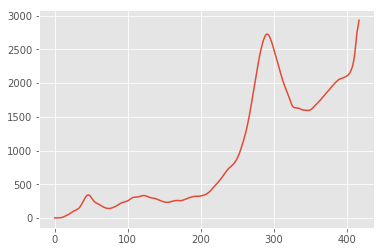

In [7]:
#График инфицирванных за все время наблюдения
plt.plot(selected_country['infected'].tolist())

In [8]:
#Отнормированные и сглаженные данные для выбранной страны
selected_country.reset_index()

,index,Unnamed: 0,country,date,total_cases,total_recovered,total_deaths,new_cases,new_recovered,new_deaths,total_cases_smoothed,total_deaths_smoothed,total_recovered_smoothed,new_cases_smoothed,new_recovered_smoothed,new_deaths_smoothed,infected
0,5454,5454,Иран,19.02.2020,0.021166,0.000000,0.021166,0.021166,0.000000,0.021166,0.140222,0.034394,0.000000,0.074079,0.000000,0.013228,0.105828
1,5682,5682,Иран,20.02.2020,0.052914,0.000000,0.021166,0.031748,0.000000,0.000000,0.203189,0.044448,0.000000,0.091012,0.000000,0.016932,0.158742
2,5809,5809,Иран,21.02.2020,0.190490,0.000000,0.042331,0.137576,0.000000,0.021166,0.276916,0.058205,0.000000,0.107592,0.000000,0.021166,0.218711
3,6017,6017,Иран,22.02.2020,0.296318,0.000000,0.052914,0.105828,0.000000,0.010583,0.380980,0.074079,0.000000,0.143623,0.000000,0.024189,0.306900
4,6142,6142,Иран,23.02.2020,0.455059,0.000000,0.084662,0.158742,0.000000,0.031748,0.588100,0.099780,0.074079,0.207120,0.074079,0.025701,0.414240
5,6359,6359,Иран,24.02.2020,0.645549,0.000000,0.126993,0.190490,0.000000,0.042331,0.950938,0.136064,0.148159,0.362838,0.074079,0.036284,0.666715
6,6672,6672,Иран,25.02.2020,1.005363,0.000000,0.169324,0.359814,0.000000,0.042331,1.510313,0.181419,0.258522,0.559375,0.110363,0.045355,1.070372
7,6716,6716,Иран,26.02.2020,1.471005,0.518556,0.201073,0.465642,0.518556,0.031748,2.364493,0.238868,0.444476,0.854181,0.185954,0.057449,1.681149
8,7019,7019,Иран,27.02.2020,2.592779,0.518556,0.275152,1.121774,0.000000,0.074079,3.778049,0.308412,0.709046,1.413556,0.264569,0.069544,2.760591
9,7164,7164,Иран,28.02.2020,4.106115,0.772542,0.359814,1.513336,0.253987,0.084662,5.955076,0.390051,1.148987,2.177027,0.439941,0.081639,4.416039


# SIR model

In [9]:
df = selected_country.reset_index()
# задаем систему дифференциальных уравнений, соотвестующих SIR - модели
def ode_model_SIR(z, t, betta, gamma, A):
    S, I, R = z
    N = 100000
    dSdt = -betta*S*I/N - A*S/N
    dIdt = betta*S*I/N + A*S/N - gamma*I
    dRdt = gamma*I
    return [dSdt, dIdt, dRdt]
# функция ode_solver_SIR
# выполняет решение системы дифференциальных уравнений
def ode_solver_SIR(t, initial_conditions, params):
    initI, initR, initS = initial_conditions
    betta, gamma, A = params['betta'].value, params['gamma'].value, params['A'].value
    res = odeint(ode_model_SIR, [initS, initI, initR], t, args=(betta, gamma, A))
    return res

In [10]:
# функция find_I возвращет массив количесвта инфицированных на каждый день с учетом указанных начальных условий
# t0 - начало рассматриваемого временного интервала
# T - конец рассматриваемого временного интервала
# S0 - количесвто восприимчивых
# betta - коэффициент интенсивности контактов индивидов с последующим инфицированием
def findI(t0, T, S0, betta, A):
# задаем начальные значения 
# initN - численность населения;принимаем равной 100 000, так как предварительно была проведена нормировка на 100 000
# initI - начальное количество инфицированных
# initR - начальное количество выздоровевших/невосприимчивых
# gamma - коээфициент интенсивности выздоровления
    N = 100000
    gamma = 1/14
    initI = df.loc[t0]['infected']
    initR = N - initI - S0

    params = Parameters()
    params.add('betta', value=betta, min=0, max=41)
    params.add('gamma', value=gamma, min=0, max=41)
    params.add('A', value=A, min=0, max=41)

    initial_conditions = [initI, initR, S0]
    params['betta'].value, params['gamma'].value, params['A'].value = [betta, gamma, A]
    tspan = np.arange(t0, T, 1)
    sol = ode_solver_SIR(tspan, initial_conditions, params)
    S, I, R = sol[:, 0], sol[:, 1], sol[:, 2]
    
    return I

In [11]:
#Функция расчета ошибки между моделью и релаьными данными
def f(t0, T, S0, betta, A): 
    I_estimated = findI(t0, T, S0, betta, A)
    I_real = df['infected'].tolist()[t0:T]
    return ((I_estimated - I_real)**2).sum() 

In [12]:
#Численная производная для бетты
def dFdBetta(t0, T, S0, betta, A):
    dBetta = 0.001
    betta1 = betta + dBetta
    return (f(t0, T, S0, betta1, A) - f(t0, T, S0, betta, A)) / dBetta

In [13]:
def dFdA(t0, T, S0, betta, A):
    dA = 0.000000001
    A1 = A + dA
    return (f(t0, T, S0, betta, A1) - f(t0, T, S0, betta, A)) / dA

#  


In [14]:
#Функция, реализуещая метод деления отрезка пополам для бетты
#Находит оптимальную бетту при заданном S0
def findBetta(S0, A):  
    beta_left  = 0
    beta_right = 40
    #Заданная точность прекращения поиска
    while beta_right - beta_left > 0.00000001:
        # середина отрезка
        beta_middle = (beta_right + beta_left) / 2
        # сравниваем ошибки на середине beta и чуть правее
        if dFdBetta(t0, T, S0, beta_middle, A) > 0:
            beta_right = beta_middle
            beta_opt = beta_left 
        if dFdBetta(t0, T, S0, beta_middle, A) < 0:
            beta_left = beta_middle
            beta_opt = beta_right
    return beta_opt

In [15]:
def findA(S0, beta):  
    A_left  = 0
    A_right = 40
    #Заданная точность прекращения поиска
    while A_right - A_left > 0.00000001:
        # середина отрезка
        A_middle = (A_right + A_left) / 2
        # сравниваем ошибки на середине beta и чуть правее
        if dFdA(t0, T, S0, beta, A_middle) > 0:
            A_right = A_middle
            A_opt = A_left 
        if dFdA(t0, T, S0, beta, A_middle) < 0:
            A_left = A_middle
            A_opt = A_right
    return A_opt

Найденное оптимальное S0: 36941.62
Найденное оптимальное betta: 0.27
Найденное оптимальное A: 0.00
Error: 20822413


AttributeError: 'Series' object has no attribute 'to_list'

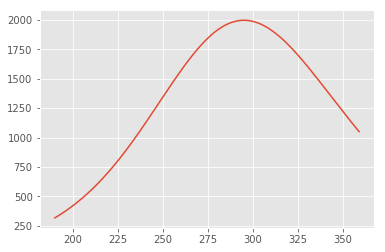

In [16]:
t0 = 190 # Первый день 
T = 360 # Последний день
#задачем правый и левый концы s
# Задаем левый конец S как кол-во людей, которые переболели до конца выбоанного периода
s_left = df.reset_index().loc[T]["total_cases_smoothed"] 
s_right = 100000
s_opt = 0
beta_opt = 0
s_h = 1  
A_opt = 0
while s_right - s_left > 1: # условие остановки с заданной точностью
    # середина отрезка
    s_middle = (s_right + s_left) / 2

    # находим оптимальную бету для середины s
    beta_opt_middle = findBetta(s_middle, A_opt)

    # находим оптимальную бету для сдвинутого s
    beta_opt_shift = findBetta(s_middle + s_h, A_opt)
    
    A_opt_middle = findA(s_middle, beta_opt_middle)
    A_opt_shift = findA(s_middle+ s_h, beta_opt_shift)
    
    #Находим ошибку модели с реальными данными для S и сдвинутого S
    err_middle_s = f(t0, T, s_middle, beta_opt_middle, A_opt_middle)
    err_shift_s = f(t0, T, s_middle + s_h, beta_opt_shift, A_opt_shift)
    
    # сравниваем ошибки на разных s
    if err_middle_s < err_shift_s: #ошибка возрастает, сдвигаем правый конец влево
        s_right = s_middle
        beta_opt = beta_opt_middle
        A_opt = A_opt_middle
        
    if err_middle_s > err_shift_s: #ошибка убывает, сдвигаем левый конец вправо      
        s_left = s_middle
        beta_opt = beta_opt_shift 
        A_opt = A_opt_shift
        
s_opt = (s_right + s_left) / 2

print('Найденное оптимальное S0: {:.2f}'.format(s_opt))
print('Найденное оптимальное betta: {:.2f}'.format(beta_opt))
print('Найденное оптимальное A: {:.2f}'.format(A_opt))
print('Error: {:.0f}'.format(f(t0, T, s_opt, beta_opt, A_opt)))
plt.plot(range(t0,T), findI(t0,T, s_opt, beta_opt, A_opt))
plt.plot(range(t0,T), df['infected'].to_list()[t0:T])

In [ ]:
A_opt = findA(s_opt, beta_opt)
print('Оптимальное A: {:.2f}'.format(A_opt))
print('Error: {:.0f}'.format(f(t0, T, s_opt, beta_opt, A_opt)))
plt.plot(range(t0,T), findI(t0,T, s_opt, beta_opt, A_opt))
plt.plot(range(t0,T), df['infected'].to_list()[t0:T])

In [14]:
# вычисление коэффициента выздоровления
def calculate_gamma(data):
    gamma = 0
    for i in range(data.shape[0] - 1):
        if (data['infected'].iloc[i] == 0):
            continue
        gamma += 1/data.shape[0]*(data['total_recovered_smoothed'].iloc[i+1]-data['total_recovered_smoothed'].iloc[i])/data['infected'].iloc[i]
    return gamma
print("Коэффициент выздоровления:", calculate_gamma(df))

Коэффициент выздоровления: 0.08288139335545894
